In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [28]:
train = pd.read_csv ("train.csv")
test = pd.read_csv ("test.csv")

In [29]:
train.shape, test.shape

((42000, 785), (28000, 784))

In [30]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# seperate pixels features as x_train and target feature as y_train
Y_train = train["label"]
X_train = train.drop(labels = ["label"], axis =1)

In [33]:
Y_train.value_counts()


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

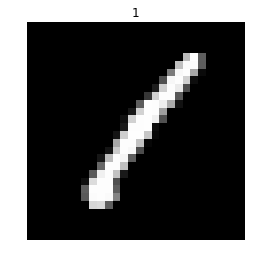

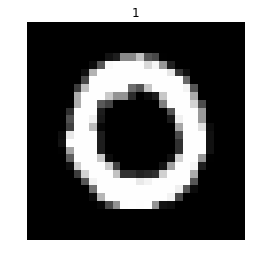

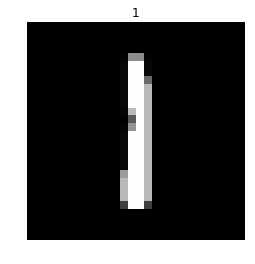

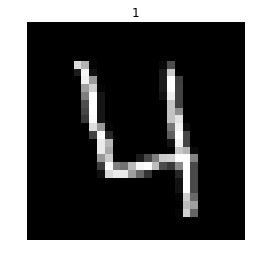

In [34]:
for i in range(0,4):
    img = X_train.iloc[i].to_numpy()
    img = img.reshape((28,28))
    plt.imshow(img, cmap = "gray")
    plt.title(train.iloc[0,0])
    plt.axis("off")
    plt.show()

In [35]:
# Normalization
X_train = X_train /255
test = test/255

In [36]:
# Reshape
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)


In [37]:
X_train.shape, test.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

In [38]:
from keras.utils.np_utils import to_categorical

In [39]:
Y_train = to_categorical(Y_train, num_classes = 10)

In [40]:
Y_train = Y_train.astype("int8")

In [41]:
Y_train[0:4]

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]], dtype=int8)

In [42]:
# seperate dataset with train_test_split
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.20, random_state=42)

In [43]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((33600, 28, 28, 1), (8400, 28, 28, 1), (33600, 10), (8400, 10))

In [44]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [45]:
# Define the optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [46]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [47]:
epochs = 50  # for better result increase the epochs
batch_size = 512

In [48]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=0.5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.5, # Randomly zoom image 5%
        width_shift_range=0.5,  # randomly shift images horizontally 5%
        height_shift_range=0.5,  # randomly shift images vertically 5%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [54]:
# Fit the model
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_val,y_val), steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/50
66/66 [==============================] - 15s 234ms/step - loss: 1.0460 - accuracy: 0.6443 - val_loss: 0.1540 - val_accuracy: 0.9560
Epoch 2/50
66/66 [==============================] - 15s 228ms/step - loss: 1.0540 - accuracy: 0.6415 - val_loss: 0.1360 - val_accuracy: 0.9604
Epoch 3/50
66/66 [==============================] - 15s 233ms/step - loss: 1.0472 - accuracy: 0.6434 - val_loss: 0.1423 - val_accuracy: 0.9593
Epoch 4/50
66/66 [==============================] - 16s 237ms/step - loss: 1.0259 - accuracy: 0.6503 - val_loss: 0.1574 - val_accuracy: 0.9545
Epoch 5/50
66/66 [==============================] - 15s 230ms/step - loss: 1.0390 - accuracy: 0.6471 - val_loss: 0.1491 - val_accuracy: 0.9564
Epoch 6/50
66/66 [==============================] - 15s 230ms/step - loss: 1.0377 - accuracy: 0.6445 - val_loss: 0.1423 - val_accuracy: 0.9604
Epoch 7/50
66/66 [==============================] - 15s 230ms/step - loss: 1.0376 - accuracy: 0.6436 - val_loss: 0.1335 - val_accuracy: 0.9618

In [55]:
model.fit(x_train, y_train, batch_size=256, epochs=200)

Epoch 1/200
33600/33600 [==============================] - 11s 313us/step - loss: 0.1846 - accuracy: 0.9440
Epoch 2/200
33600/33600 [==============================] - 11s 314us/step - loss: 0.1275 - accuracy: 0.9617
Epoch 3/200
33600/33600 [==============================] - 11s 314us/step - loss: 0.1078 - accuracy: 0.9682
Epoch 4/200
33600/33600 [==============================] - 11s 316us/step - loss: 0.1008 - accuracy: 0.9692
Epoch 5/200
33600/33600 [==============================] - 11s 320us/step - loss: 0.0900 - accuracy: 0.9721
Epoch 6/200
33600/33600 [==============================] - 11s 314us/step - loss: 0.0877 - accuracy: 0.9729
Epoch 7/200
33600/33600 [==============================] - 11s 316us/step - loss: 0.0814 - accuracy: 0.9760
Epoch 8/200
33600/33600 [==============================] - 11s 315us/step - loss: 0.0797 - accuracy: 0.9754
Epoch 9/200
33600/33600 [==============================] - 11s 315us/step - loss: 0.0714 - accuracy: 0.9781
Epoch 10/200
33600/33600 [==

33600/33600 [==============================] - 11s 318us/step - loss: 0.0299 - accuracy: 0.9898
Epoch 77/200
33600/33600 [==============================] - 10s 310us/step - loss: 0.0305 - accuracy: 0.9904
Epoch 78/200
33600/33600 [==============================] - 10s 308us/step - loss: 0.0304 - accuracy: 0.9907
Epoch 79/200
33600/33600 [==============================] - 11s 317us/step - loss: 0.0303 - accuracy: 0.9894
Epoch 80/200
33600/33600 [==============================] - 10s 309us/step - loss: 0.0287 - accuracy: 0.9902
Epoch 81/200
33600/33600 [==============================] - 11s 324us/step - loss: 0.0286 - accuracy: 0.9908
Epoch 82/200
33600/33600 [==============================] - 11s 313us/step - loss: 0.0287 - accuracy: 0.9902
Epoch 83/200
33600/33600 [==============================] - 10s 311us/step - loss: 0.0289 - accuracy: 0.9907
Epoch 84/200
33600/33600 [==============================] - 10s 308us/step - loss: 0.0293 - accuracy: 0.9908
Epoch 85/200
33600/33600 [======

33600/33600 [==============================] - 10s 300us/step - loss: 0.0216 - accuracy: 0.9929
Epoch 151/200
33600/33600 [==============================] - 10s 304us/step - loss: 0.0219 - accuracy: 0.9928
Epoch 152/200
33600/33600 [==============================] - 10s 303us/step - loss: 0.0210 - accuracy: 0.9928
Epoch 153/200
33600/33600 [==============================] - 11s 314us/step - loss: 0.0210 - accuracy: 0.9925
Epoch 154/200
33600/33600 [==============================] - 10s 305us/step - loss: 0.0212 - accuracy: 0.9932
Epoch 155/200
33600/33600 [==============================] - 10s 304us/step - loss: 0.0202 - accuracy: 0.9927
Epoch 156/200
33600/33600 [==============================] - 10s 308us/step - loss: 0.0228 - accuracy: 0.9925
Epoch 157/200
33600/33600 [==============================] - 10s 304us/step - loss: 0.0194 - accuracy: 0.9937
Epoch 158/200
33600/33600 [==============================] - 10s 305us/step - loss: 0.0214 - accuracy: 0.9926
Epoch 159/200
33600/3360

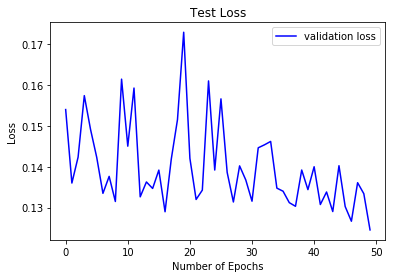

In [56]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

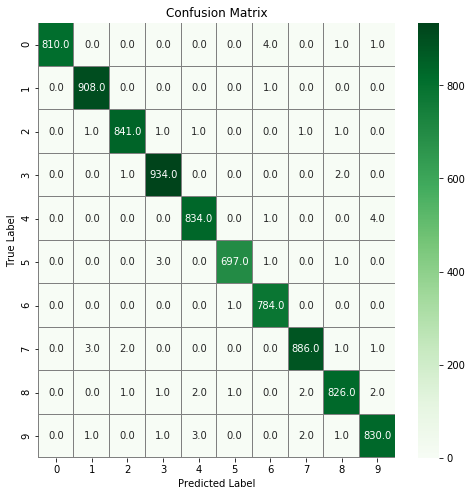

In [57]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(x_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [58]:
test_result = model.predict(test)


results = np.argmax(test_result,axis = 1) 

results = pd.Series(results,name="Label")


submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("submissCNN.csv",index=False)